In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

2022-03-06 23:29:04.559845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 23:29:04.559870: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

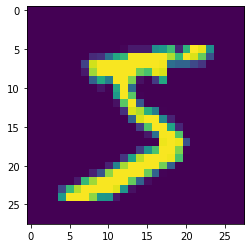

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
   optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.sparse_categorical_crossentropy,
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(X_train_flattened, y_train, epochs=5)

2022-03-06 23:29:11.387074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-06 23:29:11.387344: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-06 23:29:11.387487: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archit): /proc/driver/nvidia/version does not exist
2022-03-06 23:29:11.388663: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5


2022-03-06 23:29:11.548504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4688 - sparse_categorical_accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - sparse_categorical_accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - sparse_categorical_accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - sparse_categorical_accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - sparse_categorical_accuracy: 0.9251


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2670 - sparse_categorical_accuracy: 0.9268


[0.2669978141784668, 0.926800012588501]

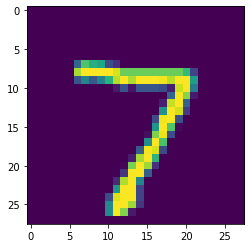

In [15]:
plt.imshow(X_test[0])

In [16]:
y_pred = model.predict(X_test_flattened)
y_pred[0].argmax()

7

In [17]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    4,    6,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,    9,  928,   17,    7,    3,   13,   10,   32,    5],
       [   4,    0,   20,  924,    0,   22,    3,   12,   16,    9],
       [   2,    1,    3,    1,  915,    0,   12,    4,   10,   34],
       [  11,    2,    3,   27,    9,  779,   19,    8,   26,    8],
       [  10,    3,    3,    1,    7,   11,  920,    2,    1,    0],
       [   1,    6,   23,    6,    8,    0,    0,  953,    2,   29],
       [  12,   11,    7,   20,    8,   32,   10,   13,  851,   10],
       [  12,    7,    1,    9,   28,    6,    0,   24,    6,  916]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

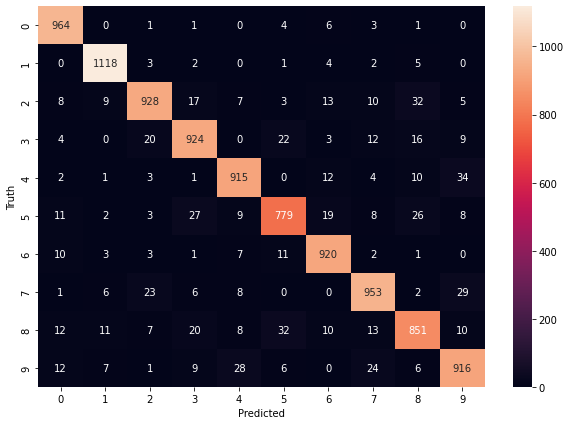

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [20]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
   optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.sparse_categorical_crossentropy,
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10


2022-03-06 23:29:31.811982: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 3ms/step - loss: 0.3158 - sparse_categorical_accuracy: 0.9117
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0383 - sparse_categorical_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9921
Epoch 9/10
1875/1875 [=====================

In [21]:
y_pred2 = model2.predict(X_test_flattened)

In [22]:
y_pred_labels2 = [np.argmax(i) for i in y_pred]
y_pred_labels2[:5]

[7, 2, 1, 0, 4]

In [23]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    4,    6,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,    9,  928,   17,    7,    3,   13,   10,   32,    5],
       [   4,    0,   20,  924,    0,   22,    3,   12,   16,    9],
       [   2,    1,    3,    1,  915,    0,   12,    4,   10,   34],
       [  11,    2,    3,   27,    9,  779,   19,    8,   26,    8],
       [  10,    3,    3,    1,    7,   11,  920,    2,    1,    0],
       [   1,    6,   23,    6,    8,    0,    0,  953,    2,   29],
       [  12,   11,    7,   20,    8,   32,   10,   13,  851,   10],
       [  12,    7,    1,    9,   28,    6,    0,   24,    6,  916]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

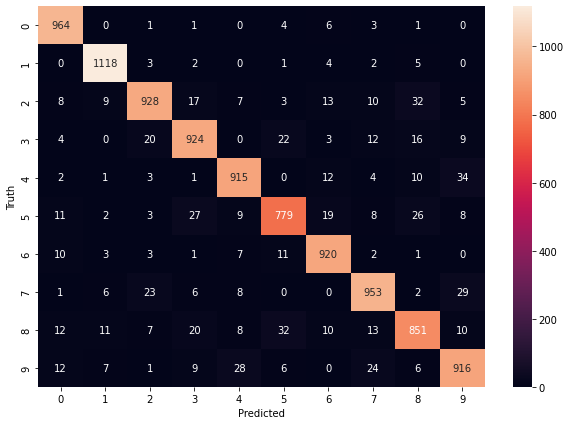

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [25]:
model2.save("model.hdf5")